<a href="https://colab.research.google.com/github/Shreyaprashanth/Samsung__Innovation__Campus/blob/main/mtcars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data='/content/drive/MyDrive/0.Samsung CSR AIML/Resources/SIC-Artificial-Intelligence/SIC_AI_Coding_Exercises/SIC_AI_Chapter_05_Coding_Exercises/data_mtcars.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(data,delimiter=',')
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

print(df.columns)

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

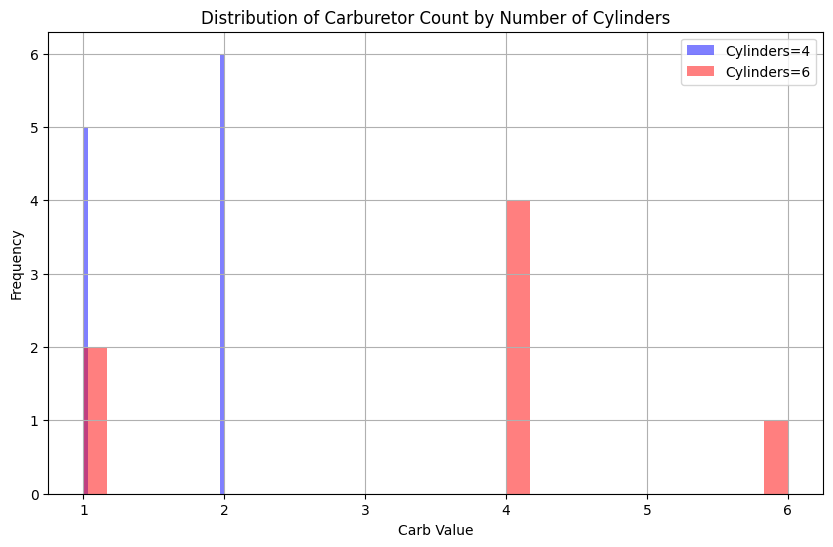

In [ ]:
plt.figure(figsize=(10,6))
df[df['cyl']==4]['carb'].hist(alpha=0.5,color='blue',  bins=30,label='Cylinders=4')
df[df['cyl']==6]['carb'].hist(alpha=0.5,color='red', bins=30,label='Cylinders=6')

plt.legend()
plt.xlabel('Carb Value')
plt.ylabel('Frequency')
plt.title('Distribution of Carburetor Count by Number of Cylinders')
plt.show()

<Axes: xlabel='carb', ylabel='count'>

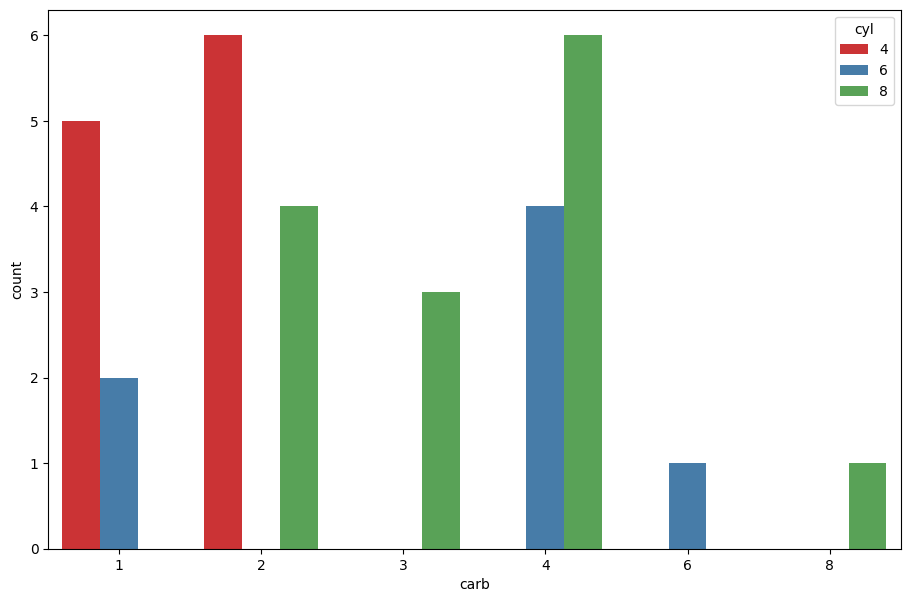

In [ ]:
import seaborn as sns
plt.figure(figsize=(11,7))
sns.countplot(x='carb',hue='cyl',data=df,palette='Set1')

In [ ]:
cat_feats = ['carb']

In [ ]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb_2  32 non-null     bool   
 12  carb_3  32 non-null     bool   
 13  carb_4  32 non-null     bool   
 14  carb_6  32 non-null     bool   
 15  carb_8  32 non-null     bool   
dtypes: bool(5), float64(5), int64(5), object(1)
memory usage: 3.0+ KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop(['qsec', 'model'], axis=1)
y = final_data['qsec']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import mean_absolute_error ,confusion_matrix
print(mean_absolute_error(y_test,predictions))

0.8539999999999998


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

In [ ]:
predictions = rfc.predict(X_test)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,predictions))

1.0526016666666824
